# 평가 지표 및 측정

## 최종 목표를 기억하라
### 이진분류의 평가지표
* 양성 클래스와 음성 클래스가 있으며, 우리의 관심 클래스는 양성 클래스다.
### 에러의 종류
* 거짓양성(False Positive): 잘못된 양성 예측 FP
* 거짓음성(False Negative): 잘못된 음성 예측 FN
<br>
* 불균형 데이터셋

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

# target 중 9인 값만 True
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state=0)


In [2]:
print(digits.target)
print(y)

[0 1 2 ... 8 9 8]
[False False False ... False  True False]


In [3]:
from sklearn.dummy import DummyClassifier # True, False 값만 존재
# most_frequent: 최빈값

# "9가 아님"을 예측값으로 내놓은 DummyClassifier를 사용하여 정확도를 계산
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f'예측된 레이블의 고유값: {np.unique(pred_most_frequent)}') # False 밖에 없음!
print('테스트 점수: {:.2f}'.format(dummy_majority.score(X_test,y_test)))
# 타이타닉에서 '여성'이라는 이유로 생존율이 올라가던 부분과 비슷

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


- 고유값이 False 하나만 존재하며 그렇게만 했는데도 테스트 점수가 90  
  \> 거의 아무것도 학습하지 않고 90% 정확도(10개 숫자 중 9가 아닐 확률이 90%)
- 문제에 따라서 그저 무조건 **한 클래스를 예측**하기만 해도 될 수 있다. 

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print(f"테스트 점수: {format(tree.score(X_test,y_test),'.2f')}")

테스트 점수: 0.92


* 정확도로만 보면 *DecisionTreeClassifier*가 *DummyClassifier*보다 높게 나옴

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.2f}'.format(logreg.score(X_test,y_test)))

logreg 점수: 0.98


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 무작위로 예측하는 DummyClassifier는 결과가 안 좋다. 
* imbalanced datasets에서 예측 성능을 정량화하는데 정확도는 적절한 측정방법이 아니기 때문이다.

### 오차 행렬(confusion matrices)

In [8]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(f'오차 행렬: \n{confusion}')
print(443/450)     # 402 + 41 = 443 (틀린걸 잘 예측한 것 + 맞는걸 잘 예측한 것)
# logreg 점수: 0.98
# 98퍼센트가 나온 결과값을 확인하는 오차행렬
'''
1행 1열과 2행 2열이 정답을 맞춘 것
-> 실제 값과 예측 값이 일치하는 열
'''

오차 행렬: 
[[402   1]
 [  6  41]]
0.9844444444444445


'\n1행 1열과 2행 2열이 정답을 맞춘 것\n-> 실제 값과 예측 값이 일치하는 열\n'

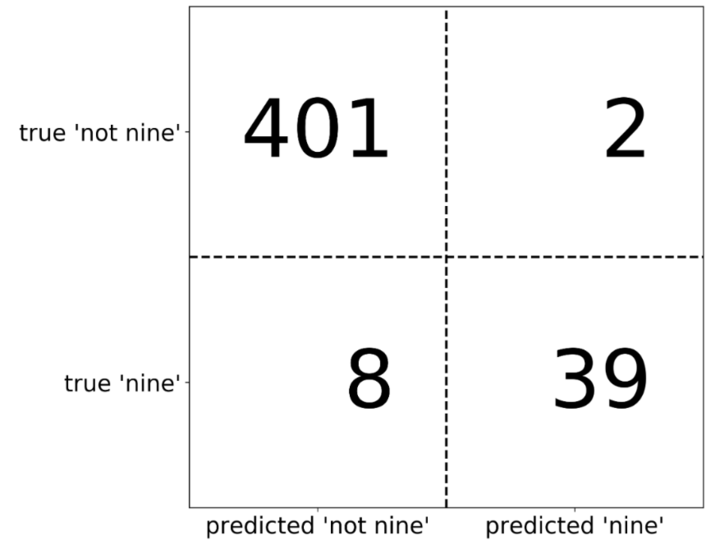

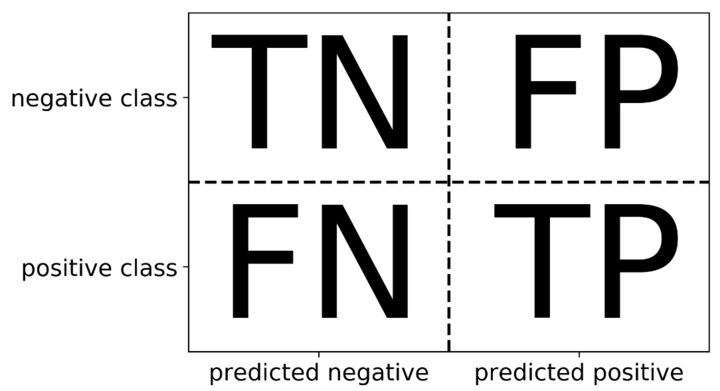

분류 성능 평가지표
acciracy(정확도)
클래스 라벨을 얼마나 잘 맞췄는지
에러를 찾고 그의 비율을 구한뒤 (1-에러비율) 한거

confusion matrix 혼동행렬, 오차행렬
병이있는사람에게 없다고 판단하면 위험이 큼 이때 사용
얼마나 잘못(혹은 올바로) 예측했느닞, 얼마나 혼동스러운지 보여주는 행렬

맞춘 값의 분포가 고르게 분포되어있는가 ( A~D 중 A만 맞추고 있지는 않은가 등 )
-> 균형을 이루고 있는가

정확도 맞춘거/전체
정밀도 
재현율

In [9]:
print('빈도 기반 더미 모델: ')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n결정트리: ')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱회귀: ')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델: 
[[403   0]
 [ 47   0]]

결정트리: 
[[390  13]
 [ 24  23]]

로지스틱회귀: 
[[402   1]
 [  6  41]]


### 정확도와의 관계
* 정확히 예측한 수 TP + TN 을 전체 샘플 수로 나눈 것이다.
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}
### 정밀도, 재현율, f-점수
* 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 **정밀도(precision)과 재현율(recall)** 이다.
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}
<br>
* **재현율**은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용한다. 즉 거짓 음성(FN)을 피하는 것이 중요할 때다. 재현율을 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 한다.
\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
<br>
\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}
<br>
* 정밀도와 재현율의 조화 평균인 f-점수(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해준다. 특별히 이 공식을 f1-점수라고도 한다. 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 낫다. 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는 게 단점이다.

In [11]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 score: {:.2f}'.format( f1_score(y_test, pred_most_frequent)))
print('트리 모델의 f1 score: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score: {:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


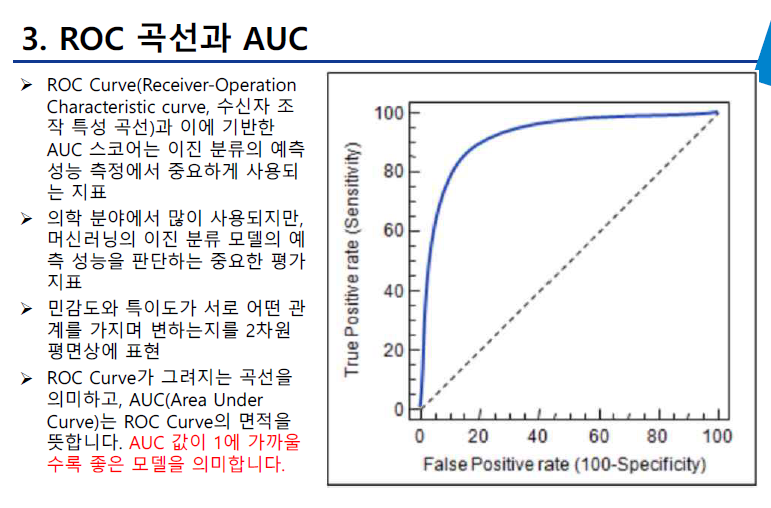

* AUC는 ROC curve의 아래와 x축과의 사이의 넓이

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names = ['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(classification_report(y_test, pred_logreg, target_names = ['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



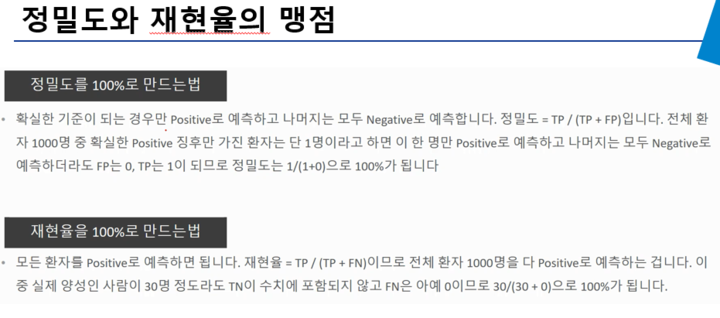

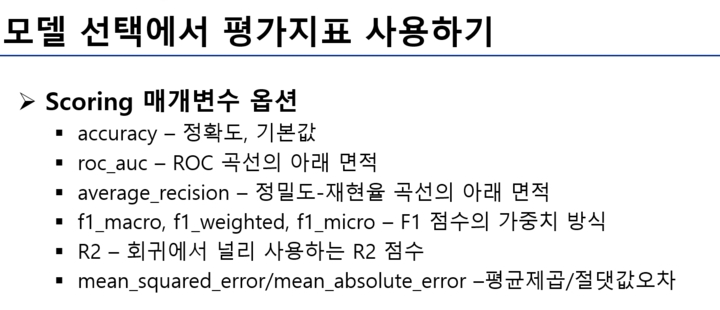

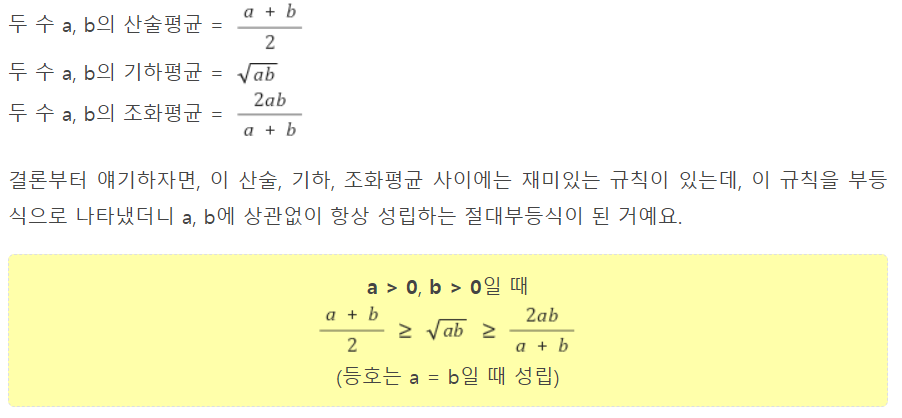